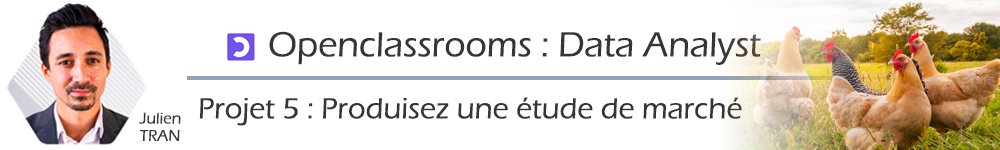

### Mission 2 : Nettoyage et préparation des données

Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

### Sommaire // Mission 2 🐔

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Création d'un Dendrogramme](#3)
* [4.Création d'une carte du monde avec la répartition des pays par clusters](#4)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#j'importe les librairies qui vont me servir plus tard

import numpy as np
import pandas as pd
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#Je definis le nombre de lignes max affichées sur None

pd.set_option("max_rows", None) 
pd.set_option("display.precision",5)

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [2]:
# import de l'échantillon et des informations relatives aux cours
data = pd.read_csv('C:/Users/33643/Desktop/P5/CSV/Data_pays_km_2018.csv', index_col = 0,encoding='utf-8-sig')

data.head()

,Var_pop(%),Prot_tot(g/hab/j),Ratio_prot(%),Kcal_tot(hab/j),PIB($),Dep_import(%),Autosuf_prod(%),km_from_FR
Zone,,,,,,,,
Afghanistan,8.01418,55.52,19.43444,2040,483.88587,47.16981,54.71698,5572.71
Afrique du Sud,4.34586,84.37,42.70475,2899,6369.23161,23.11490,79.08438,8789.06
Albanie,-0.27672,115.74,53.35234,3360,5254.38480,44.44444,59.25926,1545.60
Algérie,6.29279,91.83,26.93020,3322,4153.95722,0.00000,100.00000,2023.54
Allemagne,1.63473,105.40,60.74953,3554,47684.75523,52.28091,94.29772,815.79


## 3.Création d'un Dendrogramme <a class="anchor" id="3"></a>

Au préalable, il est nécessaire de centrer-réduire les données. C’est à dire, recalculer chaque valeur de manière à ce que la moyenne de la variable soit égale à 0 et la variance et l’écart-type égalent 1. Pour une variable donnée, on soustrait à chaque valeur la moyenne de la variable, puis on divise le tout par l’écart-type.

Ensuite, nous pouvons procéder à la classification ascendante hiérarchique selon la méthode de Ward. L’objectif est de regrouper des pays similaires.

In [3]:
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

fig = plt.figure(figsize=(15,20))
fig.set_dpi(300)

#Affichage du dendrogramme
#dendrogram(Z, orientation="left", labels=data.index)
#plt.axvline(x=11.80, c='grey', lw=1, linestyle='dashed')
#plt.title('Classification ascendante hierarchique')
#plt.show()

<Figure size 4500x6000 with 0 Axes>

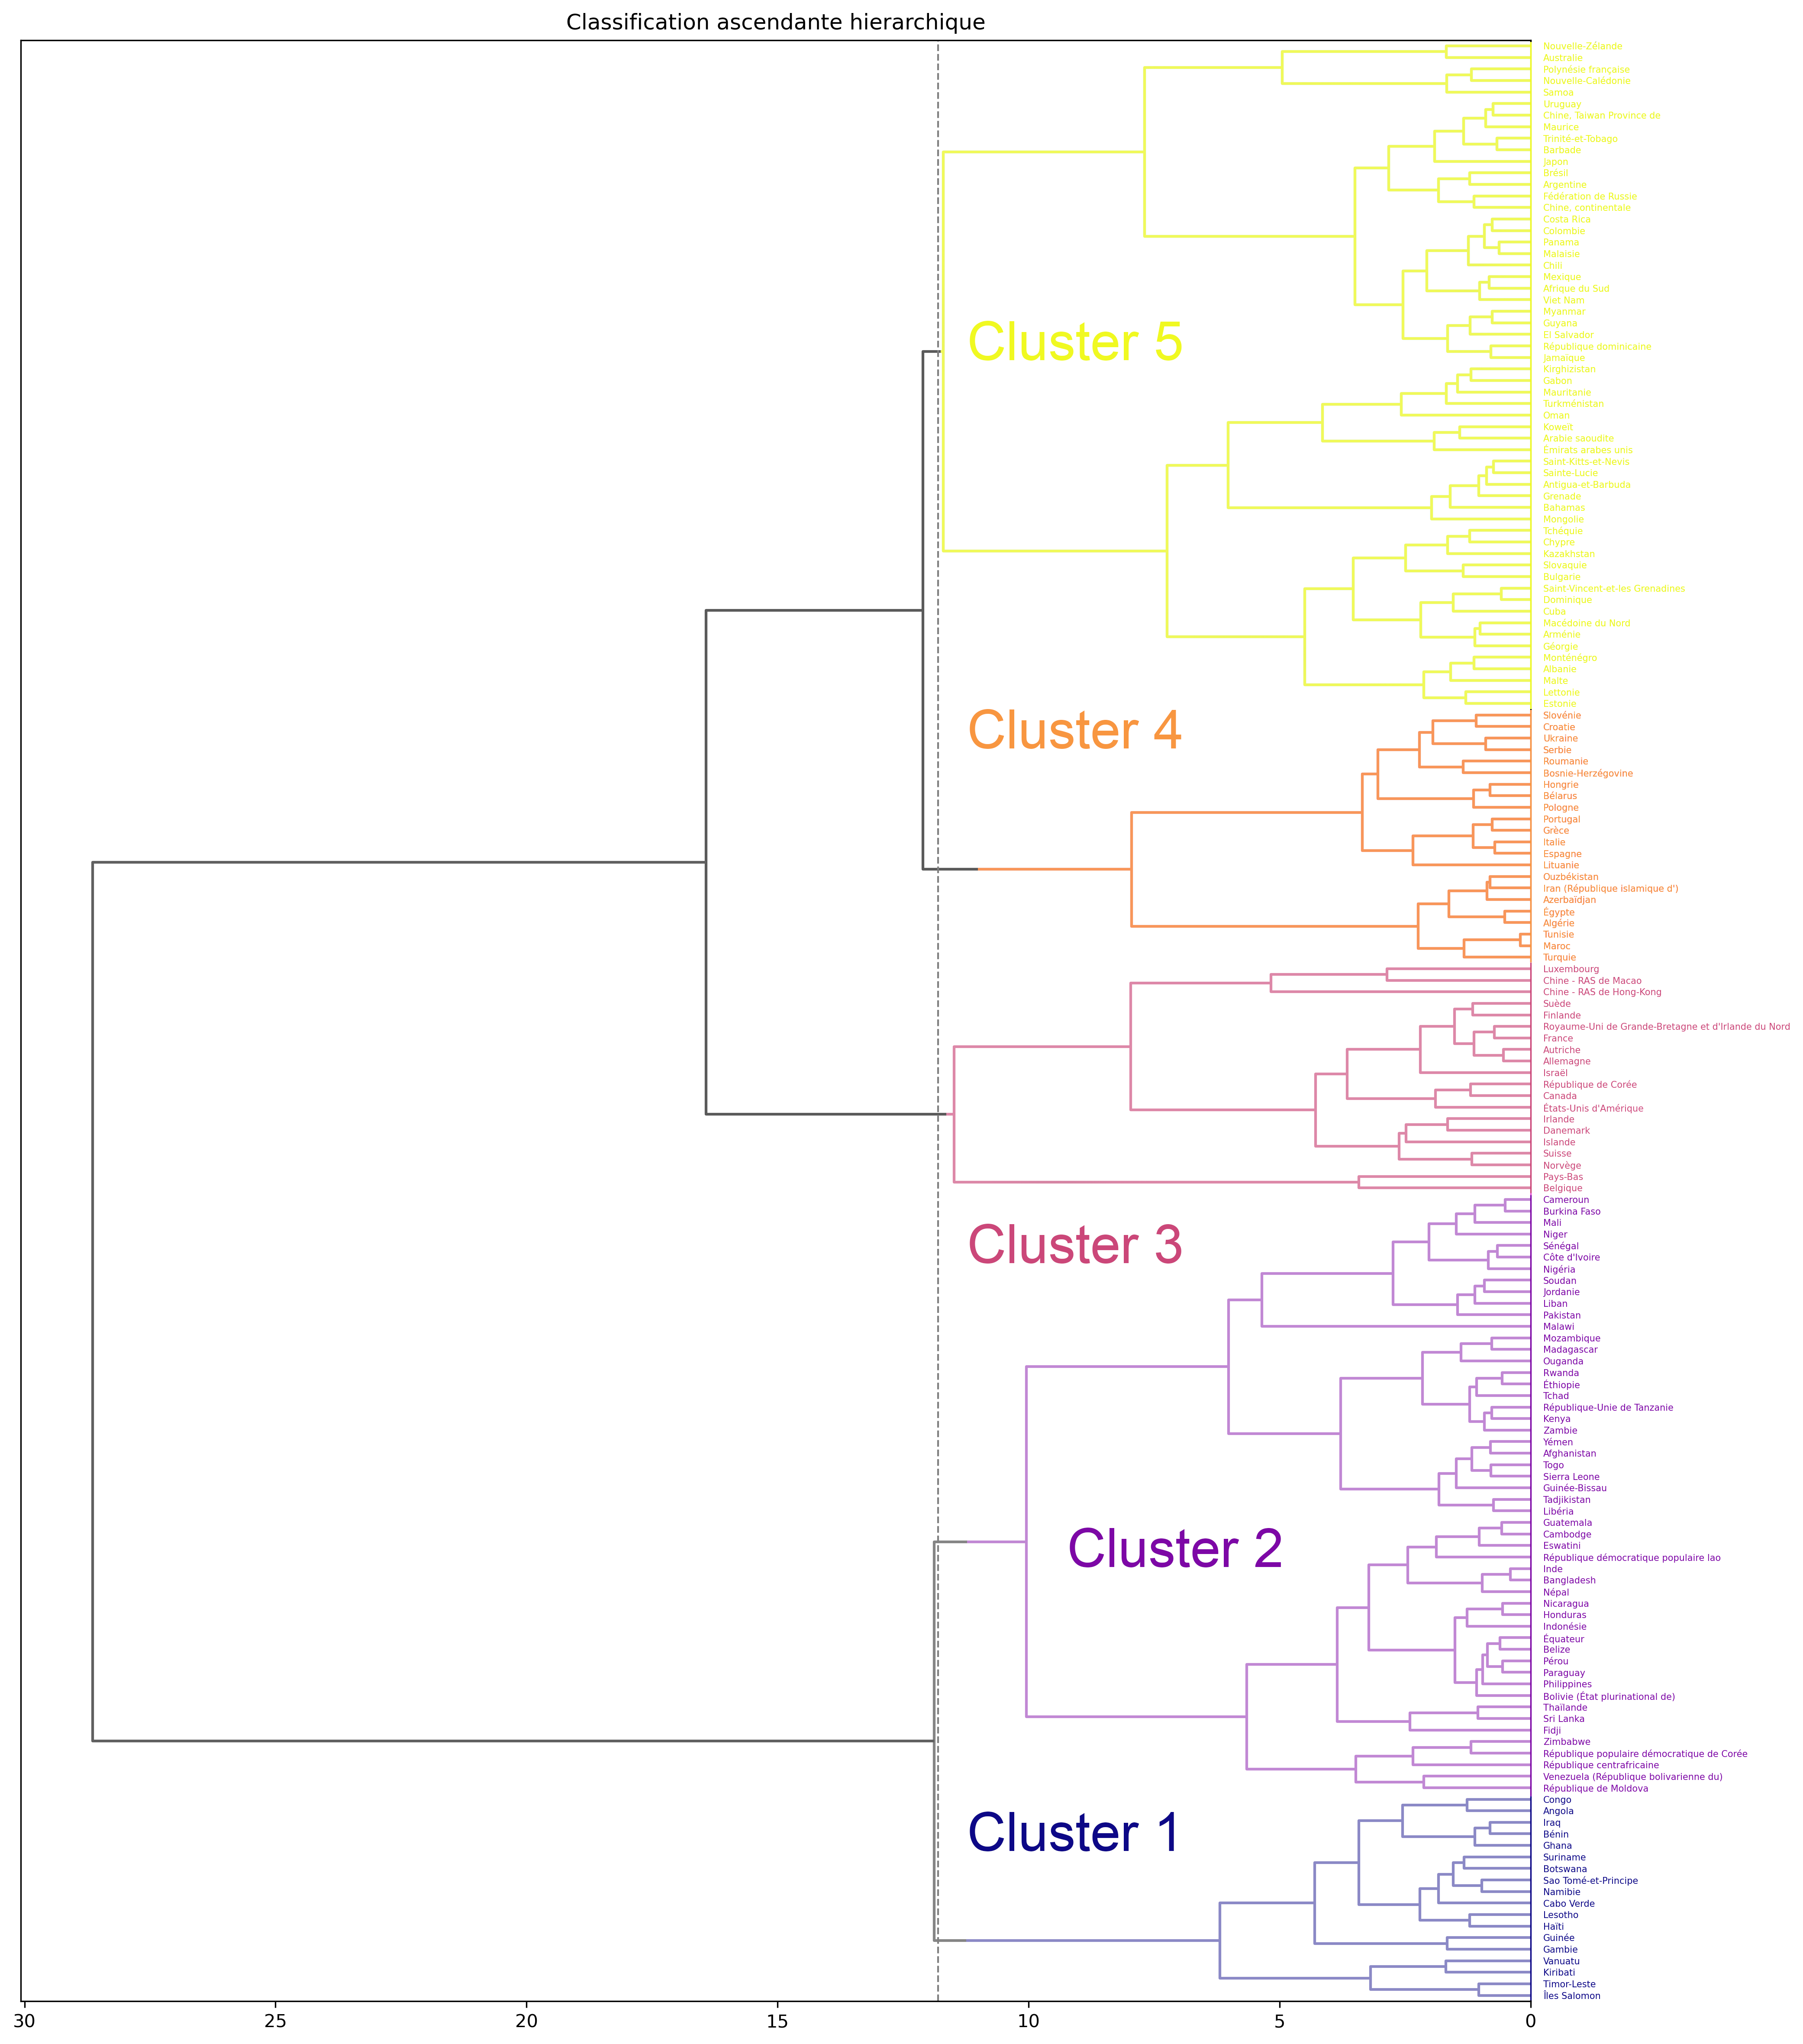

Une fois le dendrogramme obtenu, nous pouvons choisir en combien de clusters nous pouvons diviser notre arbre. Ici, une partition en 5 clusters permet d’avoir des groupes de taille raisonnable à analyser.

Graphiquement, on voit bien que la méthode de Ward a permis de minimiser les distances intra-classes à chaque regroupement.

In [4]:
# Réducation en 5 clusters
clusters = fcluster(Z, 5, criterion='maxclust')

clusters

array([2, 5, 5, 4, 3, 1, 5, 5, 5, 5, 5, 3, 4, 5, 2, 5, 4, 3, 2, 1, 2, 4,
       1, 5, 5, 2, 1, 2, 2, 3, 5, 3, 3, 5, 5, 5, 5, 1, 5, 2, 4, 5, 3, 5,
       4, 5, 5, 2, 4, 5, 2, 3, 2, 5, 2, 3, 3, 5, 1, 5, 1, 4, 5, 2, 1, 2,
       5, 1, 2, 4, 1, 2, 2, 4, 1, 3, 3, 3, 4, 5, 5, 2, 5, 2, 5, 1, 5, 1,
       5, 2, 2, 4, 3, 5, 2, 5, 2, 2, 5, 4, 5, 5, 5, 5, 5, 2, 5, 1, 2, 2,
       2, 2, 3, 5, 5, 5, 2, 4, 2, 5, 2, 3, 2, 2, 4, 5, 4, 2, 3, 2, 2, 5,
       2, 2, 4, 3, 2, 5, 5, 5, 5, 1, 2, 4, 2, 5, 4, 2, 2, 3, 3, 1, 2, 2,
       5, 2, 1, 2, 5, 4, 5, 4, 4, 5, 1, 2, 5, 2, 2, 2], dtype=int32)

In [5]:
#Comparaison des clusters trouvés
courses = pd.DataFrame({"cluster": clusters, "title": names})

courses.rename(columns={'cluster': 'clusters'}, inplace = True)
courses.rename(columns={'title': 'country'}, inplace = True)

courses.head()

,clusters,country
0,2,Afghanistan
1,5,Afrique du Sud
2,5,Albanie
3,4,Algérie
4,3,Allemagne


In [6]:
#Exportation de la table des clusters en fichier CSV
#courses.to_csv("C:/Users/33643/Desktop/P5/CSV/livrables/pays_clusters.csv", index=False,encoding='utf-8-sig')

## 4.Création d'une carte du monde avec la répartition des pays par clusters <a class="anchor" id="4"></a>

In [7]:
#Importation d'un fichier CSV de la liste des pays

data_countries_geo = pd.read_csv('C:/Users/33643/Desktop/P5/CSV/world_country_data.csv', index_col = 0)
data_countries_geo = data_countries_geo.reset_index(drop=False)
data_countries_geo = data_countries_geo.drop(columns = ['usa_state_code', 'usa_state_latitude', 'usa_state_longitude', 'usa_state'])

data_countries_geo.head()

,country_code,latitude,longitude,country
0,AD,42.54624,1.60155,Andorra
1,AE,23.42408,53.84782,United Arab Emirates
2,AF,33.93911,67.70995,Afghanistan
3,AG,17.06082,-61.79643,Antigua and Barbuda
4,AI,18.22055,-63.06862,Anguilla


In [8]:
#Création d'une table regroupant les pays, leur code, leurs coordonnées et leur num de cluster

Clusters_2018_code = pd.read_csv('C:/Users/33643/Desktop/P5/CSV/Clusters_2018_V3_code.csv', index_col = 0)
Clusters_2018_code = Clusters_2018_code.reset_index(drop=False)
Clusters_2018_code.head()

,clusters,country,country_code
0,2,Afghanistan,AF
1,5,Afrique du Sud,ZA
2,5,Albanie,AL
3,4,Algérie,DZ
4,3,Allemagne,DE


In [9]:
data_countries_geo_fr = pd.merge(Clusters_2018_code, data_countries_geo, on= 'country_code')
data_countries_geo_fr.rename(columns={'country_y': 'country'}, inplace = True)
data_countries_geo_fr = data_countries_geo_fr.drop(columns = ['country_x'])

In [12]:
data_countries_geo_fr.head()

,clusters,country_code,latitude,longitude,country
0,2,AF,33.93911,67.70995,Afghanistan
1,5,ZA,-30.55948,22.93751,South Africa
2,5,AL,41.15333,20.16833,Albania
3,4,DZ,28.03389,1.65963,Algeria
4,3,DE,51.16569,10.45153,Germany


In [11]:
#Exportation de la table en fichier CSV
#data_countries_geo_fr.to_csv("C:/Users/33643/Desktop/P5/CSV/data_countries_geo_fr_V3.csv", index=False,encoding='utf-8-sig')

Voici une représentation cartographique de nos 5 clusters.

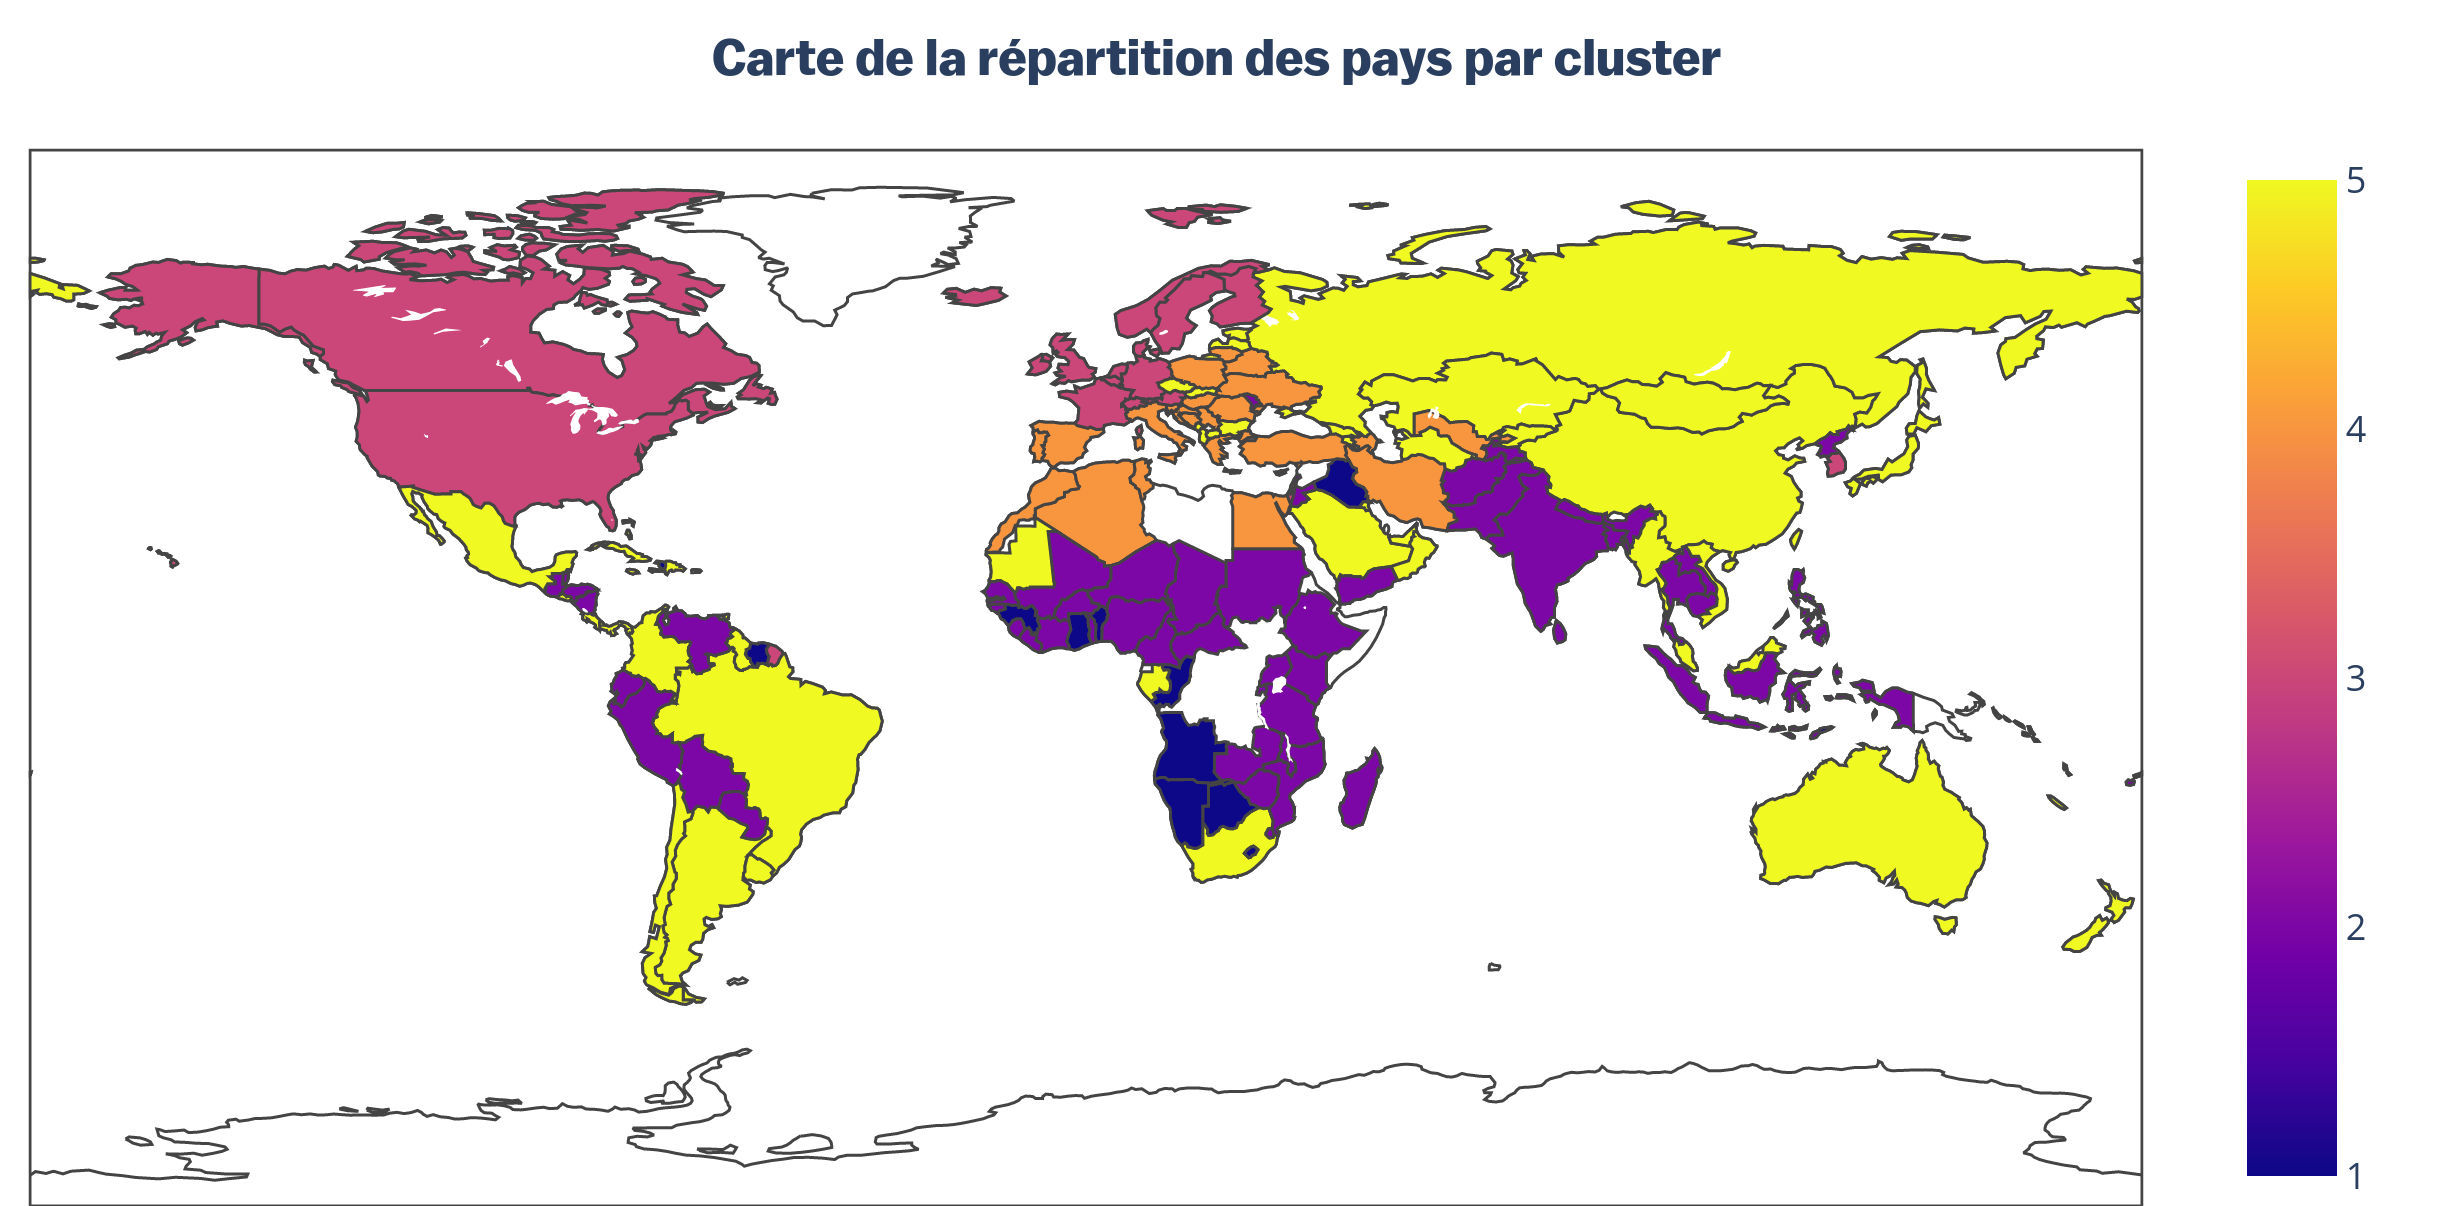